Q1. What is the relationship between polynomial functions and kernel functions in machine learning
algorithms?


A1. Polynomial functions and kernel functions are related in the context of machine learning algorithms, specifically Support Vector Machines (SVMs). In SVMs, kernel functions are used to implicitly map the data into a higher-dimensional feature space where it may become linearly separable. Polynomial functions can be used as kernel functions in SVMs to capture nonlinear relationships between the data points.

The polynomial kernel function takes the form:

K(x, x') = (γ * (x · x') + r)^d

where x and x' are the input data points, · represents the dot product, γ is a scaling factor, r is an optional coefficient, and d is the degree of the polynomial.

By using a polynomial kernel function, SVMs can effectively learn nonlinear decision boundaries. The kernel function calculates the similarity (or inner product) between pairs of data points in the higher-dimensional space, without explicitly mapping them to that space.

Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?


 To implement an SVM with a polynomial kernel in Python using Scikit-learn, you can follow these steps:

In [ ]:
from sklearn.svm import SVR

# Create an SVR object with the polynomial kernel
svr = SVR(kernel='poly', degree=3)

# Fit the SVR model to your training data
svr.fit(X_train, y_train)

# Predict using the trained SVR model
y_pred = svr.predict(X_test)


In this example, kernel='poly' specifies the polynomial kernel, and degree represents the degree of the polynomial. You can adjust the degree parameter to control the complexity of the polynomial function.

Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?


A3. In Support Vector Regression (SVR), epsilon (ε) is a parameter that defines the margin of tolerance around the predicted values. It determines the width of the epsilon-tube around the regression line within which no penalty is incurred for prediction errors.

Increasing the value of epsilon can lead to an increase in the number of support vectors in SVR. A larger epsilon allows more data points to fall within the margin of tolerance, and thus, more support vectors are considered.

Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter
affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works
and provide examples of when you might want to increase or decrease its value?


A4. The performance of Support Vector Regression (SVR) is influenced by several parameters:

Kernel Function: The choice of kernel function determines the type of nonlinearity that can be captured in the data. Different kernels, such as linear, polynomial, radial basis function (RBF), or sigmoid, are suited for different types of relationships. It is important to select an appropriate kernel based on the problem's characteristics.

C Parameter: The C parameter controls the trade-off between achieving a smaller training error and a larger margin. A smaller value of C allows for a larger margin but may lead to more training errors. Conversely, a larger C emphasizes fitting the training data more precisely but may result in overfitting. Adjusting C is crucial for controlling the balance between bias and variance.

Epsilon (ε) Parameter: The epsilon parameter in SVR defines the margin of tolerance around the predicted values. A larger epsilon allows for a wider tolerance, which can make the model more flexible but potentially introduces more errors. Choosing an appropriate epsilon depends on the desired trade-off between model flexibility and prediction accuracy.

Gamma Parameter: The gamma parameter is specific to the RBF kernel and determines the influence of individual training examples. Higher values of gamma result in a narrower, more localized decision boundary, leading to more complex and potentially overfit models. Lower values of gamma create a smoother decision boundary. Choosing an optimal gamma value depends on the dataset and problem at hand.

The choice of these parameters should be made through proper experimentation, including techniques like cross-validation, grid search, or model selection methods, to find the combination that yields the best performance for the given task. The impact of each parameter may vary depending on the characteristics of the data, the complexity of the relationship being modeled, and the desired trade-offs.

Q5. Assignment
Import necessary libraries and load the dataset

Split the dataset into training and testing set

Preprocess the data with any technique of your choice (eg. scaling, normaliazation)

Create an instance of SVC Classifer and train it on training data

Use trained Classifier to predict labels on testing data

Evaluate the performance of classifier using any metric of your choice

Tune Hyperparameter of SVC using GridSearchCV or RandomizedSearchCV to imporve the performance

Train the tuned classifier for entire dataset

Save the trained classifier to a file for future use

Using dataset for cancer classification
Dataset Source : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Attribute Information:

ID number
Diagnosis (M = malignant, B = benign)
Ten real-valued features are computed for each cell nucleus:

radius (mean of distances from center to points on the perimeter)
texture (standard deviation of gray-scale values)
perimeter
area
smoothness (local variation in radius lengths)
compactness (perimeter^2 / area - 1.0)
concavity (severity of concave portions of the contour)
concave points (number of concave portions of the contour)
symmetry
fractal dimension ("coastline approximatiom")
The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.



In [4]:
import pandas as pd 
df = pd.read_csv('./data/cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
## Dropping id and Unnamed: 32 column as statistically insignificant
df = df.drop(labels=['id','Unnamed: 32'],axis=1)
df.shape

(569, 31)

In [9]:
diagnosis_map = {'B':0,'M':1}
df['diagnosis'] = df['diagnosis'].replace(diagnosis_map)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

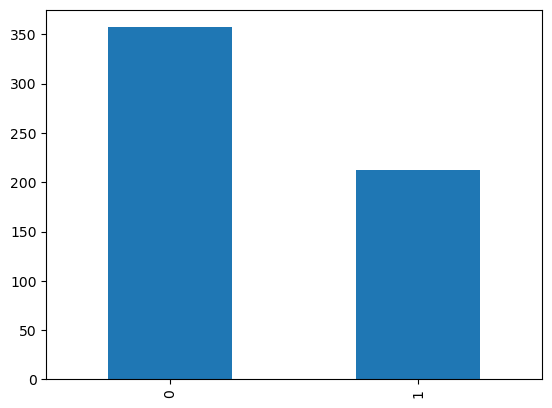

In [11]:
df.diagnosis.value_counts().plot(kind='bar')

In [12]:
## Seperate dependent and independent variable
X = df.drop(labels=['diagnosis'],axis=1)
Y = df[['diagnosis']]

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3, random_state=42, stratify=Y)
xtrain.shape

(398, 30)

In [14]:
xtest.shape

(171, 30)

In [16]:
#Preprocessing the data with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.705820,1.049745,2.121295,1.669337,2.276458,4.544295,3.539139,2.848393,4.032390,2.639773,...,1.459510,0.949589,1.868176,1.306840,1.335383,2.313855,2.346427,2.049399,3.944281,0.866554
1,0.536388,-0.909945,0.569095,0.390316,-0.065868,0.644945,0.393543,0.557002,-0.116781,-0.401530,...,0.508294,-0.645315,0.501917,0.330087,0.477013,1.242091,1.052574,1.255850,0.167978,0.405242
2,-0.131456,-0.993336,-0.148848,-0.211543,-0.916169,-0.508574,-0.567530,-0.606645,-0.079867,-0.512454,...,-0.362451,-1.028485,-0.280415,-0.399387,-0.196219,0.368661,-0.080795,-0.140014,0.741988,0.687521
3,0.928077,1.418055,0.925405,0.828546,0.329734,0.223748,0.983188,0.443947,-1.866520,-0.555982,...,0.365921,0.351910,0.386082,0.243539,-0.330866,-0.464721,0.030311,-0.072253,-2.040715,-0.861167
4,0.144699,-0.972488,0.158315,-0.009697,1.205760,0.585041,0.137701,0.562858,1.116158,0.117991,...,0.008957,-1.257732,0.059367,-0.140450,-0.187804,0.359126,-0.064176,0.376471,0.373873,0.047726


In [17]:
xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.113702,-0.022757,0.096063,0.012384,-0.832738,-0.461400,-0.004036,-0.491044,-1.257434,-0.724475,...,0.000703,0.404309,0.020756,-0.092937,-0.978852,0.079425,0.493724,-0.282461,-0.686799,-0.506946
1,-0.582321,-0.124679,-0.624337,-0.594570,-0.834128,-0.836920,-0.999032,-1.019701,-0.954736,-0.300434,...,-0.548155,0.186524,-0.619604,-0.566124,-0.137312,-0.745058,-1.086629,-0.960215,-0.048836,-0.166454
2,-1.794022,1.181780,-1.801388,-1.342789,-3.005421,-1.104989,-1.091673,-1.235829,-0.836610,-0.530708,...,-1.411472,0.728530,-1.432825,-1.085410,-1.775790,-1.194868,-1.300578,-1.727112,-0.062875,-0.739798
3,-0.869748,-0.604178,-0.859420,-0.798682,0.823368,-0.460651,-0.715928,-0.604353,-0.367798,0.109566,...,-0.801951,0.085001,-0.815929,-0.727209,0.199304,-0.662419,-0.793957,-0.608162,0.135222,-0.277388
4,-0.387886,-0.634291,-0.384750,-0.457270,1.157092,0.169460,-0.613048,-0.473220,1.130923,0.506930,...,-0.381022,-0.684614,-0.409022,-0.457498,0.645321,-0.346484,-0.624925,-0.515707,0.249088,0.093857


In [18]:
## Saving the scaler to pickle file to save for future use
import pickle
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,file=f)

In [19]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(xtrain,ytrain.values.flatten())

SVC(kernel='linear')

In [20]:
ypred_test = svc.predict(xtest)
ypred_test[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

<AxesSubplot:>

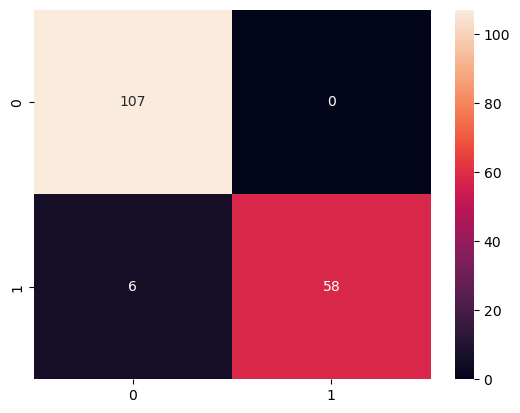

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest,ypred_test)
sns.heatmap(cf,annot=True,fmt='d')

In [22]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



In [23]:
parameters = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear']
}
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(SVC(),param_grid=parameters,refit=True,scoring='f1',cv=5,verbose=3)
gscv.fit(xtrain,ytrain.values.flatten())

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.906 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.906 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.949 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.983 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.909 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.926 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.903 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.983 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.909 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.926 total time=   0.0s
[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.903 total time=   0.0s
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.983 total time=   0.0s
[CV 4/5] END .C=1000, gamma=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='f1', verbose=3)

In [24]:
# Classification report for tuned model
print('Classification report for tuned model :\n')
print(classification_report(ytest,ypred_test))

Classification report for tuned model :

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



In [25]:
gscv.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [26]:
final_svc = SVC(kernel='linear',C=0.1,gamma=1)
final_svc.fit(X,Y.values.flatten())

SVC(C=0.1, gamma=1, kernel='linear')

In [27]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(final_svc,file=f)